In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
dataset=read.csv('/content/insurance.csv') 
y=data$charges ; x1=data$age ; x2=data$bmi ; x3=data$children; x4=data$smoker; x5=data$region
df=na.omit(data.frame(x1,x2,x3,x4,x5,y)) # To omit any missing values in the dataset.
dim(df)
head(df)

#There are no missing values in the dataset hence using the original dataset further.


  x1     x2 x3 x4 x5         y
1 19 27.900  0  1  3 16884.924
2 18 33.770  1  0  2  1725.552
3 28 33.000  3  0  2  4449.462
4 33 22.705  0  0  1 21984.471
5 32 28.880  0  0  1  3866.855
6 31 25.740  0  0  2  3756.622


In [ ]:
%%R
dataset=read.csv('/content/insurance.csv') 
head(dataset)

  age sex    bmi children smoker region   charges
1  19   0 27.900        0      1      3 16884.924
2  18   1 33.770        1      0      2  1725.552
3  28   1 33.000        3      0      2  4449.462
4  33   1 22.705        0      0      1 21984.471
5  32   1 28.880        0      0      1  3866.855
6  31   0 25.740        0      0      2  3756.622


Q1 Split the dataset into two subsets, consider the first subset as a trainset with 80% of the original data, and the second subset as a testset with 20% of the original data.

In [ ]:
%%R

#spliting the dataset into trainset and testset.
df = read.csv('/content/insurance.csv')
set.seed(32)
n=nrow(df)
ind=sample(n,n*0.8)
train=df[ind,] #Train data
train
test=df[-ind,] #Test data
test


    age sex    bmi children smoker region   charges
2    18   1 33.770        1      0      2  1725.552
8    37   0 27.740        3      0      1  7281.506
12   62   0 26.290        0      1      2 27808.725
13   23   1 34.400        0      0      3  1826.843
18   23   1 23.845        0      0      0  2395.172
22   30   0 32.400        1      0      3  4149.736
23   18   1 34.100        0      0      2  1137.011
25   37   1 28.025        2      0      1  6203.902
27   63   0 23.085        0      0      0 14451.835
45   38   1 37.050        1      0      0  6079.672
59   53   0 22.880        1      1      2 23244.790
63   64   1 24.700        1      0      1 30166.618
64   28   0 25.935        1      0      1  4133.642
65   20   0 22.420        0      1      1 14711.744
73   53   0 28.100        3      0      3 11741.726
75   44   1 27.400        2      0      3  7726.854
80   41   0 32.965        0      0      1  6571.024
83   22   1 37.620        1      1      2 37165.164
94   35   1 

Q2 Model the output variable using an appropriate distribution using trainset, estimate the parameters of the model and predict the output in the testset.

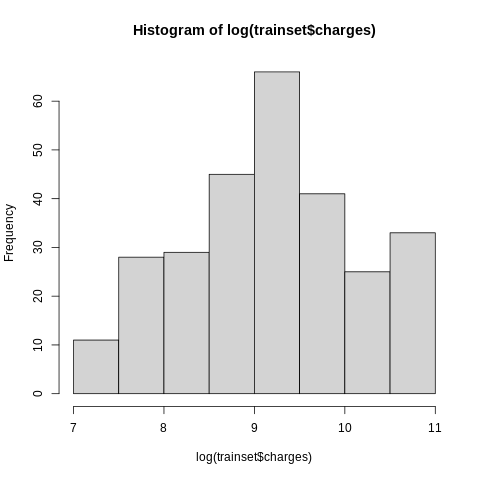

In [ ]:
%%R
#Modelling the output variable using trainset of the data.
df = read.csv('/content/insurance.csv')
set.seed(32)
n=nrow(df)
ind=sample(n,n*0.8)
trainset=df[ind,]
testset=df[-ind,]

hist(log(trainset$charges))



In [ ]:
# Estiamting parameters of the variable $charges in the testset using normal distribution.
%%R
df=read.csv('/content/insurance.csv')
set.seed(32)
n=nrow(df)
ind=sample(n,n*0.8)
trainset=df[ind,]
testset=df[-ind,]
X=testset$charges
mu=mean(X); sigma=sd(X)
c(mu,sigma)     # parameter

[1] 11630.40 10857.24


[1]     11630.4 117879766.1


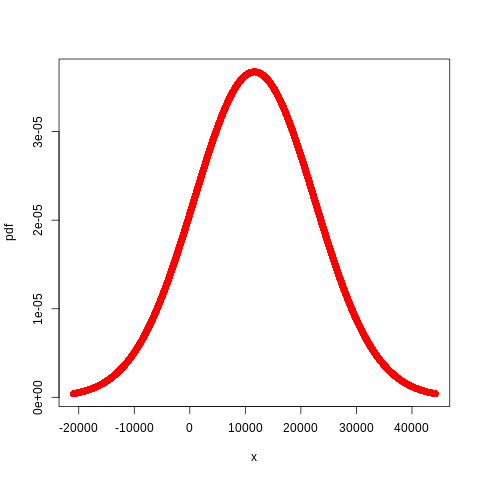

In [ ]:
# Predicting the output in the testset.
%%R
df=read.csv('/content/insurance.csv')
set.seed(32)
n=nrow(df)
ind=sample(n,n*0.8)
trainset=df[ind,]
testset=df[-ind,]
mu=mean(testset$charges);v=var(testset$charges)
print(c(mu,v))
L=mu-3*sd(testset$charges); U=mu+3*sd(testset$charges)
x=seq(L,U,0.1)
pdf=dnorm(x,mu,sd(testset$charges))
plot(x,pdf,col='red')

#Prediction 11630.4

Q3) Apply either Linear or logistic regression to model the output variable on the input variables. Mention which task of the predictive analytics is going to be solved.

In [ ]:
%%R
# linear regression is an appropriate glm since the output variable(charges) is continuous.
data= read.csv('/content/insurance.csv')
head(data)
# linear regression : family = 'gaussian'
fit=glm(charges~.,data, family='gaussian')
coef(fit)  # parameter estimation


(Intercept)         age         sex         bmi    children      smoker 
-13099.6817    266.5838    196.9701    344.1377    547.6069  23841.7988 
     region 
  -162.2798 


In [ ]:
%%R
summary(fit) # feature selection using glm


Call:
glm(formula = charges ~ ., family = "gaussian", data = data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-11459.9   -2761.8    -905.3    1532.9   24314.0  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -13099.68    2019.55  -6.486 3.09e-10 ***
age            266.58      23.08  11.550  < 2e-16 ***
sex            196.97     665.60   0.296   0.7675    
bmi            344.14      59.39   5.794 1.56e-08 ***
children       547.61     276.17   1.983   0.0482 *  
smoker       23841.80     783.80  30.418  < 2e-16 ***
region        -162.28     300.69  -0.540   0.5898    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 37304277)

    Null deviance: 5.5430e+10  on 347  degrees of freedom
Residual deviance: 1.2721e+10  on 341  degrees of freedom
AIC: 7063.8

Number of Fisher Scoring iterations: 2



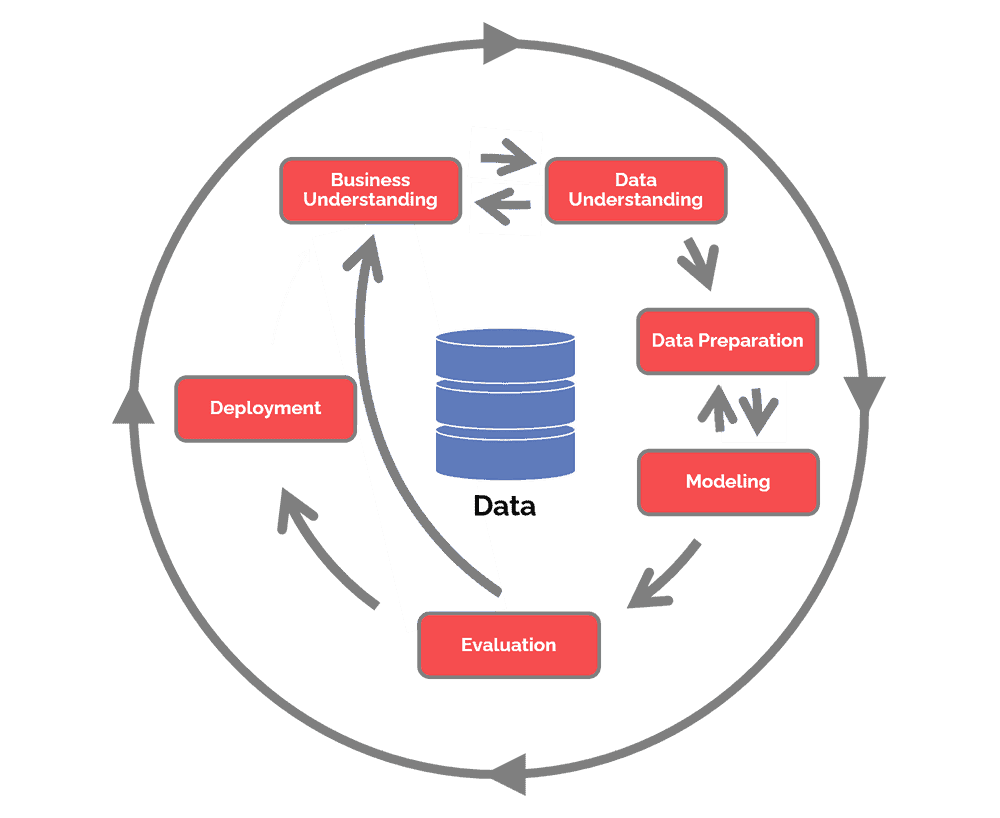

By choosing and applying the appropriate model to the dataset **The Modelling stage** is accomplished.
The steps involved in Modelling include:

*  Selecting the modelling technique,
*  Generating the test design,
*  Building the model and
*  Assessing the model.




Q4Specify the significant input variables on the output variable at the level of 𝛼=0.05. Estimate the parameters of your model. Predict the output of the test dataset using the trained model. Provide the functional form of the optimal predictive model.



In [ ]:
%%R
dataset=read.csv('/content/insurance.csv') 
head(data)
fit=glm(charges~.,data, family='gaussian')
coef(fit) # Parameter estimation


(Intercept)         age         sex         bmi    children      smoker 
-13099.6817    266.5838    196.9701    344.1377    547.6069  23841.7988 
     region 
  -162.2798 


In [ ]:
%%R
summary(fit)



Call:
glm(formula = charges ~ ., family = "gaussian", data = data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-11459.9   -2761.8    -905.3    1532.9   24314.0  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -13099.68    2019.55  -6.486 3.09e-10 ***
age            266.58      23.08  11.550  < 2e-16 ***
sex            196.97     665.60   0.296   0.7675    
bmi            344.14      59.39   5.794 1.56e-08 ***
children       547.61     276.17   1.983   0.0482 *  
smoker       23841.80     783.80  30.418  < 2e-16 ***
region        -162.28     300.69  -0.540   0.5898    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 37304277)

    Null deviance: 5.5430e+10  on 347  degrees of freedom
Residual deviance: 1.2721e+10  on 341  degrees of freedom
AIC: 7063.8

Number of Fisher Scoring iterations: 2



The Pr(>|t|) column represents the p-value associated with the value in the t value column.

If the p-value is less than the given significance level (α = 0.05) then the predictor variable is said to have a statistically significant relationship with the response variable in the model and if the p-value is not less than 0.05, then it does not have a significant relationship with the response variable in the model.

Hence The significant input variables on the output variable at 𝛼=0.05 are **age,bmi,children,smoker**

The Predictive Model:
 ***yhat=-13099.68 + 266.58 * age + 344.14 * bmi + 547.61 * children + 23841.80 * smoker***

---



In [ ]:
%%R
df = read.csv('/content/insurance.csv')
set.seed(143)
n=nrow(df)
ind=sample(n,n*0.8)
train=df[ind,] #Train data
test=df[-ind,] #Test data

df_new=(test)[-7] # Excluding the output variable($charges) from the test data to make a prediction of the output variable

library(MASS)

model_full=glm(charges~.,train , family='gaussian')
model_red=stepAIC(model_full)

#Prediction

pred_full=predict(model_full,df_new)
pred_red=predict(model_red,df_new)
pred_full
print(pred_red)


Start:  AIC=5620.14
charges ~ age + sex + bmi + children + smoker + region

           Df   Deviance    AIC
- region    1 9.2617e+09 5618.3
- sex       1 9.2942e+09 5619.3
<none>        9.2557e+09 5620.1
- children  1 9.5777e+09 5627.6
- bmi       1 1.0074e+10 5641.7
- age       1 1.3485e+10 5722.8
- smoker    1 3.8622e+10 6015.3

Step:  AIC=5618.32
charges ~ age + sex + bmi + children + smoker

           Df   Deviance    AIC
- sex       1 9.3022e+09 5617.5
<none>        9.2617e+09 5618.3
- children  1 9.5893e+09 5626.0
- bmi       1 1.0076e+10 5639.8
- age       1 1.3556e+10 5722.2
- smoker    1 3.8622e+10 6013.3

Step:  AIC=5617.53
charges ~ age + bmi + children + smoker

           Df   Deviance    AIC
<none>        9.3022e+09 5617.5
- children  1 9.6276e+09 5625.1
- bmi       1 1.0107e+10 5638.6
- age       1 1.3575e+10 5720.6
- smoker    1 3.9434e+10 6017.1
         3         25         26         29         35         40         45 
 7633.9013  7700.9590 14533.1417  -227.9981 31

Q5 Propose an appropriate measure to evaluate the performance of your model. Compute this measure for your fitted model. 

**Measure to evaluate the performance of the model:**

Root mean square error is one of the most commonly used measures for evaluating the quality of predictions.The RMSE is the square root of the variance of the residuals. 
It indicates the absolute fit of the model to the data–how close the observed data points are to the model's predicted values. 

The lower the RMSE, the better a given model is able to “fit” a dataset.

In [ ]:
%%R
data = read.csv('/content/insurance.csv')
#split the dataset
set.seed(32)
n=nrow(data)
indexes = sample(n,n*(80/100)) # the ratio of trainset is 80% and testset is 20%
trainset = data[indexes,]
testset = data[-indexes,]


In [ ]:
%%R
# Modelling
library(MASS)

model_full=glm(charges~.,trainset , family='gaussian')
model_red=stepAIC(model_full)

Start:  AIC=5669.52
charges ~ age + sex + bmi + children + smoker + region

           Df   Deviance    AIC
- region    1 1.1062e+10 5667.7
- sex       1 1.1065e+10 5667.8
- children  1 1.1123e+10 5669.2
<none>        1.1055e+10 5669.5
- bmi       1 1.2042e+10 5691.3
- age       1 1.4863e+10 5749.8
- smoker    1 4.0001e+10 6025.0

Step:  AIC=5667.7
charges ~ age + sex + bmi + children + smoker

           Df   Deviance    AIC
- sex       1 1.1071e+10 5665.9
- children  1 1.1134e+10 5667.5
<none>        1.1062e+10 5667.7
- bmi       1 1.2044e+10 5689.3
- age       1 1.4910e+10 5748.7
- smoker    1 4.0003e+10 6023.0

Step:  AIC=5665.91
charges ~ age + bmi + children + smoker

           Df   Deviance    AIC
- children  1 1.1143e+10 5665.7
<none>        1.1071e+10 5665.9
- bmi       1 1.2073e+10 5688.0
- age       1 1.4923e+10 5746.9
- smoker    1 4.1180e+10 6029.1

Step:  AIC=5665.73
charges ~ age + bmi + smoker

         Df   Deviance    AIC
<none>      1.1143e+10 5665.7
- bmi     1 1.2

In [ ]:
%%R 
# Evaluating performance of the model using RMSE.

yhat_full=predict(model_full,testset) #Predict
yhat_red=predict(model_red,testset)
yi=testset$charges #yi=Actual

rmse_full=sqrt(sum((yhat_full-yi)^2)/n) #Evaluation
rmse_red=sqrt(sum((yhat_red-yi)^2)/n)

c(rmse_full,rmse_red)

#  SINCE THE FULL MODEL LEADS TO THE LOWER  VALUE OF RMSE, THE FULL MODEL IS THE BETTER MODEL.


[1] 2125.970 2165.092
